In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats

In [3]:
from feature_extraction_helper import reshape_feature_array, resort_ipsi_contra, sort_tensor_ipsi_contra

In [7]:
master_path = Path(Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Koetter-et-al_data\Testdata') / 'Raw_Data')
out_path = Path(master_path/'Processed_Data')
fish_paths = list(master_path.glob('*f[0-9]*'))
fish_paths

[WindowsPath('//portulab.synology.me/data/Kata/Figures_Paper/Koetter-et-al_data/Testdata/Raw_Data/240423_f0')]

In [8]:
fish= 0
fish_id =  fish_paths[fish].name
exp_name = 'testfish'
fish_id, exp_name



('240423_f0', 'testfish')

In [9]:
save_data_path = out_path

In [10]:
t_feature_vector_array = fl.load(save_data_path/ '{}_t_feature_vector_array.h5'.format(fish_id))
l_feature_vector_array = fl.load(save_data_path/ '{}_l_feature_vector_array.h5'.format(fish_id))
r_feature_vector_array = fl.load(save_data_path/ '{}_r_feature_vector_array.h5'.format(fish_id))

In [11]:
## tail, left fin, right fin

tensor =  fl.load(out_path / '{}_tensor.h5'.format(fish_id))
tensor.shape

(460, 3, 50)

In [12]:
max_n = int(l_feature_vector_array.shape[1]/4)
max_n

9

In [13]:
t_reshaped_array, t_peaks_a_array, t_peaks_i_array, t_valleys_a_array, t_valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)


Reshaped array shape: (460, 4, 9)
Reshaped array shape: (460, 4, 9)
Reshaped array shape: (460, 4, 9)


In [28]:
laterality = fl.load(out_path/'{}_bout_laterality.h5'.format(fish_id))
np.unique(laterality)

array([0., 1.])

## load data

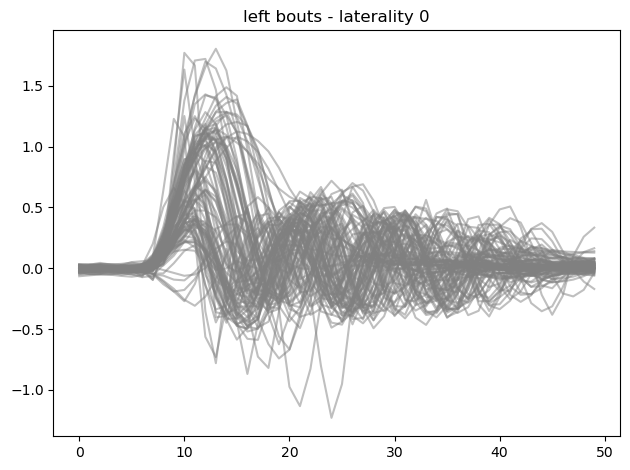

In [29]:
plt.figure()
plt.title('left bouts - laterality 0')
plt.plot(tensor[:, 0,:][laterality==0][:100].T, c='gray', alpha=0.5)

plt.tight_layout()

# Sort ipsi contra

In [36]:
sorted_tensor, ipsi_fin_ids = sort_tensor_ipsi_contra(tensor, laterality)
print (sorted_tensor.shape)
print("Ipsilateral fin identities:", np.unique(ipsi_fin_ids))


(460, 3, 50)
Ipsilateral fin identities: [0. 1.]


### Plot example bout

1 0.0 0.0


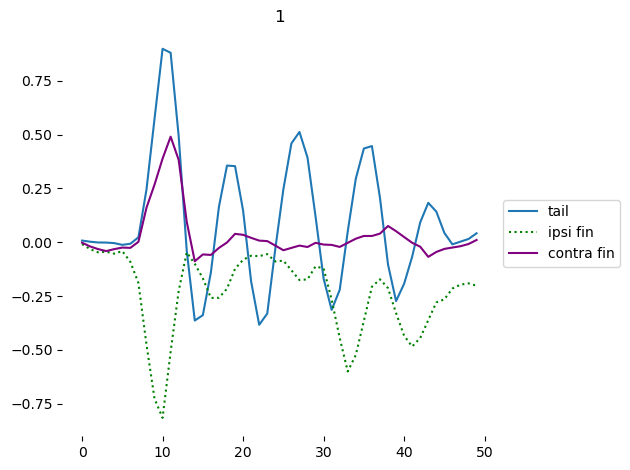

In [35]:
import random
f_size=10
bout = random.randrange(0, tensor.shape[0])

print (bout, ipsi_fin_ids[bout], laterality[bout]) # features.bout_angle.iloc[bout])

plt.figure()
plt.plot(sorted_tensor[bout, 0, :].T, label='tail')
plt.plot(sorted_tensor[bout, 1, :].T, c='green', ls=':', label='ipsi fin')
plt.plot(sorted_tensor[bout, 2, :].T, c='purple',  label='contra fin')
plt.title(bout)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=f_size)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
plt.tight_layout()

## save new tensor

In [20]:
fl.save(save_data_path/ '{}_tensor_ipsi_contra.h5'.format(fish_id), sorted_tensor)
fl.save(save_data_path/ '{}_ipsi_fin_ids.h5'.format(fish_id), ipsi_fin_ids)

In [21]:
save_data_path

WindowsPath('//portulab.synology.me/data/Kata/Figures_Paper/Koetter-et-al_data/Testdata/Raw_Data/Processed_Data')